## This notebook is designed to generate the graph representing the urban environment considered in the EXE-USEPE-001: Last mile delivery situation

In [1]:
"""
We define a default path where the modules developed in USEPE are stored
"""

default_path = r"C:\workspace3\bluesky-USEPE-github-2"

"""
We define a second default path where the scenarios are stored
"""

default_path2 = r"C:\workspace3\scenarios-USEPE\scenario\USEPE\exercise_1"


In [2]:
import os
import configparser
import pickle
import osmnx as ox

os.chdir(default_path)
from usepe.city_model.city_graph import cityGraph
from usepe.city_model.corridors_implementation import corridorLoad
from usepe.city_model.dynamic_segments import dynamicSegments
from usepe.city_model.multi_di_graph_3D import MultiDiGrpah3D
from usepe.city_model.utils import read_my_graphml

# Configuration file
We create a config file with the following fields:

* [City]

mode = rectangle

#hannover_lat = 52.376

#hannover_lon = 9.76

#zone_size = 1000

hannover_lat_min = 52.297839999994714

hannover_lat_max = 52.438260000005286

hannover_lon_min = 9.643080000001035

hannover_lon_max = 9.844349999998968

import = False

imported_graph_path = ./data/exercise_1.graphml


* [Layers]

number_of_layers = 9

layer_width = 25

* [BuildingData]

lat_min = 52.297839999994714

lat_max = 52.438260000005286

lon_min = 9.643080000001035

lon_max = 9.844349999998968

divisions = 20

directory_hannover = C:\Users\jbueno\Desktop\Stadtmodell_Hannover_CityGML_LoD1\LoD1_Graph

* [Options]

one_way = False

simplify = True

simplification_distance = 0

simplification_error = 2

* [Outputs]

graph_path = ./data/exercise_1.graphml

* [Segments]

import = True

path = ./data/reference_segments.pkl

* [Corridors]

corridors =

altitude = 250

delta_z = 25

speed = 50

acceleration_length = 50

file_path_corridors = ./data/usepe-hannover-corridors.geojson

* [Strategic_Deconfliction]

ratio = 3

delay = 60

In [3]:
    # -------------- 1. CONFIGURATION FILE -----------------
    """
    This section reads the configuration file.
    Change the config_path to read the desired file
    """
    # CONFIG
    config_path = default_path2 + r"\settings_exercise_1_reference.cfg"
    config = configparser.ConfigParser()
    config.read( config_path )

['C:\\workspace3\\scenarios-USEPE\\scenario\\USEPE\\exercise_1\\settings_exercise_1.cfg']

# City Graph

Obtaining the graph from OSM...


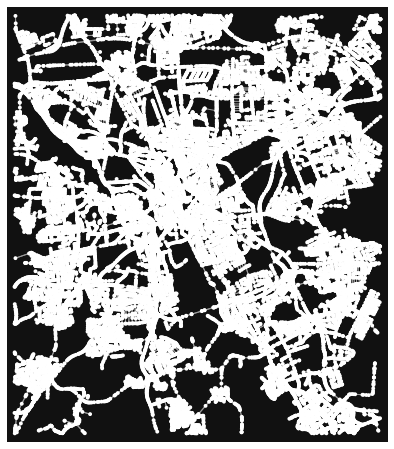

Simplifying the graph...
Removing nodes from the straight lines...
Reading the building data...
Calculating centroids...
Assigning altitude to sectors...
Creating diagonal edges...


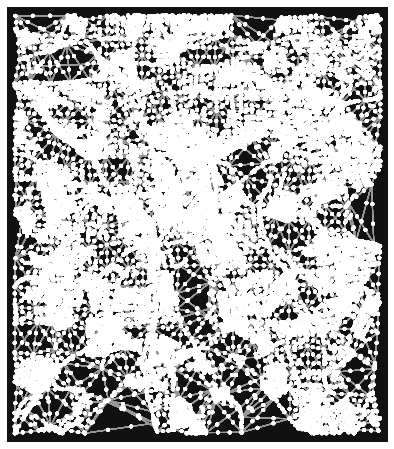

Saving the graph...


In [4]:
    # -------------- 2. CITY GRAPH -------------------------
    """
    This section creates a city graph or loads the graph defined with the city section of the
    configuration file.
    """
    # City
    os.chdir(default_path2)
    if config['City'].getboolean( 'import' ):
        filepath = config['City']['imported_graph_path']
        G = read_my_graphml( filepath )
        G = MultiDiGrpah3D( G )
        # fig, ax = ox.plot_graph( G )
    else:
        G = cityGraph( config )


# Segments

In [5]:
    # -------------- 3. SEGMENTS ----------------------------
    """
    This section creates a airspace segmentation or loads the segmentation defined with the segment
    section of the configuration file.
    Comment it to neglect the segmentation
    """
    os.chdir(default_path2)
    if config['Segments'].getboolean( 'import' ):
        path = config['Segments']['path']
        with open( path, 'rb' ) as f:
            segments = pickle.load( f )
    else:
        segments = None

# Corridors

In [6]:
    # -------------- 4. CORRIDORS ---------------------------
    """
    This section loads the corridors defined with the corridor section of the configuration file
    Comment it to neglect the creation of corridors
    """
    G, segments = corridorLoad( G, segments, config )

Active corridors []


# Segment update

In [7]:
    # ---------------- 5. Segment update --------------------
    """
    Once we have loaded the segments and we created the corridors, we update the graph based on the parameters of the segments
    """
    G, segments = dynamicSegments( G, config, segments, deleted_segments=None )

Updating segments...
Assigning segments...
Updating segment velocity...
Updating travel times...
Dynamic segments completed


# Saving graph

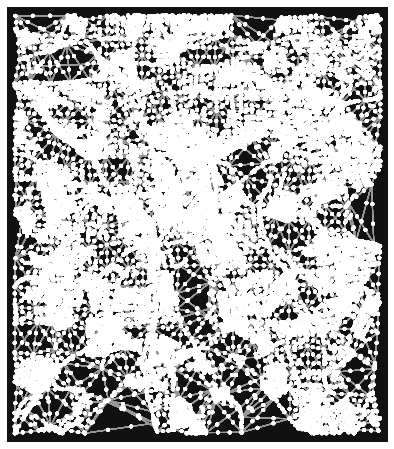

In [8]:
os.chdir(default_path2)
fig, ax = ox.plot_graph( G )
filepath = config['Outputs']['graph_path']
ox.save_graphml( G, filepath )